https://github.com/tonygeorge1984/Python-Sars-Cov-2-Mutation-Analysis

This is a repo created for analyzing mutations on the nucleotides of various genes of Sars Cov-2. Two different Nucleotide sequences of Sars Cov-2 are read from the NCBI gene bank. It is then conveted into Numpy arrrays. The data read into numpy array is then analyzed and compared. Each gene from 2 diffeent sequence can be compared against each other. By doing this kind of a data analysis we can find the mutations associated with each gene. This would help the vaccine/drug develelopment efforts to focus on those gene expression that has the least mutation.

In [3]:
# This dictionary is used for reshaping the numpy array for each of the genes. 
# For example, the gene ORF1ab numpy array will be reshaped with rows=115 and cols=115.
# The second element in the list represent 'n' number of dummy 'N' to be added at the end of
# each gene nucletode seq to make to compactible with the rows and cols of the array.
numpy_image_dict = {'gene=ORF1ab':[(115,115),7],
                    'gene=S':[(62,62),22],
                    'gene=ORF3a':[(28,30),12],
                    'gene=E':[(15,16),12], 
                    'gene=M':[(26,27),33],
                    'gene=ORF6':[(14,14),10],    
                    'gene=ORF7a':[(19,20),14],
                    'gene=ORF7b':[(12,12),12],
                    'gene=ORF8':[(19,20),14],
                    'gene=N':[(36,36),36],
                    'gene=ORF10':[(11,11),4]}


# This dictionary has the codons for the amino acids from mRNA.
amacid_dict = {'UUU':('F','PHE','Phenylalanine'),'UUC':('F','PHE','Phenylalanine'),
               'UUA':('L','LEU','Leucine'),'UUG':('L','LEU','Leucine'),
               'UCU':('S','SER','Serine'),'UCC':('S','SER','Serine'),
               'UCA':('S','SER','Serine'),'UCG':('S','SER','Serine'), 
               'UAU':('Y','TYR','Tyrosine'),'UAC':('Y','TYR','Tyrosine'),
               'UAA':('STOP'),'UAG':('STOP'),
               'UGU':('C','CYS','Cysteine'),'UGC':('C','CYS','Cysteine'),
               'UGA':('STOP'),'UGG':('W','TRP','Tryptophan'),
               'CUU':('L','LEU','Leucine'),'CUC':('L','LEU','Leucine'),
               'CUA':('L','LEU','Leucine'),'CUG':('L','LEU','Leucine'),
               'CCU':('P','PRO','Proline'),'CCC':('P','PRO','Proline'),
               'CCA':('P','PRO','Proline'),'CCG':('P','PRO','Proline'),
               'CAU':('H','HIS','Histidine'),'CAC':('H','HIS','Histidine'),
               'CAA':('Q','GLU','Glutamine'),'CAG':('Q','GLU','Glutamine'),
               'CGU':('R','ARG','Arginine'),'CGA':('R','ARG','Arginine'),
               'CGG':('R','ARG','Arginine'),'CGC':('R','ARG','Arginine'),
               'AUU':('I','ILE','Isoleucine'),'AUC':('I','ILE','Isoleucine'),
               'AUA':('I','ILE','Isoleucine'),'AUG':('M','MET','Methionine'),
               'ACU':('T','THR','Threonine'),'ACC':('T','THR','Threonine'),
               'ACA':('T','THR','Threonine'),'ACG':('T','THR','Threonine'),
               'AAU':('N','ASN','Asparagine'),'AAC':('N','ASN','Asparagine'),
               'AAA':('K','LYS','Lysine'),'AAG':('K','LYS','Lysine'),
               'AGU':('S','SER','Serine'),'AGC':('S','SER','Serine'),
               'AGG':('R','ARG','Arginine'),'AGA':('R','ARG','Arginine'),
               'GUU':('V','VAL','Valine'),'GUC':('V','VAL','Valine'),
               'GUA':('V','VAL','Valine'),'GUG':('V','VAL','Valine'),
               'GCU':('A','ALA','Alanine'),'GCC':('A','ALA','Alanine'),
               'GCA':('A','ALA','Alanine'),'GCG':('A','ALA','Alanine'),
               'GAU':('D','ASP','Aspartate'),'GAC':('D','ASP','Aspartate'),
               'GAA':('E','GLU','Glutamate'),'GAG':('E','GLU','Glutamate'),
               'GGU':('G','GLY','Glycine'),'GGC':('G','GLY','Glycine'),
               'GGA':('G','GLY','Glycine'),'GGG':('G','GLY','Glycine')
}


In [5]:
def read_dna_seq(file_name):
    # This method reads the dna sequence from the file downloaded from NCBI and crates a python dictionary.
    fil = open(file_name,'r')
    fil_list = fil.readlines()
    fil.close
    
    genome = {}
    gene_name = ''
    protein_name = ''
    gene_seq = ''
    for i in fil_list:
        if i[0] == '>':
            # Reads each line from the file and creates a dictionary with the following information for each
            # gene. {<'gene_name-1'>:[<protein_name>,nucleotide sequence],
            #        <'gene_name-2'>:[<protein_name>,nucleotide sequence],
            #        <'gene_name-2'>:[<protein_name>,nucleotide sequence]}
            if list(genome.keys()) != []:
                gene_seq = gene_seq.replace('\n','')
                genome[gene_name].append(gene_seq)
            gene_seq = ''
            g_st = i.find('[gene=')
            g_end = i[g_st:].find(']')
            p_st = i.find('[protein=')
            p_end = i[p_st:].find(']') 

            if g_st > 0 and g_end > 0:
                gene_name = i[g_st+1:g_st+g_end]
                genome[gene_name] = []
            
            if p_st > 0 and p_end > 0:
                protein_name = i[p_st+1:p_st+p_end]
                genome[gene_name].append(protein_name)
        else:
            gene_seq += i
    gene_seq = gene_seq.replace('\n','')
    genome[gene_name].append(gene_seq)    
    return genome

In [6]:
def gene_mod(genome):
    # This method modifies each of the sequence with dummy nucleotide 'N' so that for the shape of the numpy array.
    genome_keys = list(genome.keys())
    for k in genome_keys:
        if len(numpy_image_dict[k]) > 1:
            N = numpy_image_dict[k][1]
            seq = add_N(N,genome[k][1])
            genome[k][1] = seq
    return genome

def add_N(n,seq):
    # This method is called from gene_mod() method, for creating dummy nucleotide 'N'.
    for i in range(0,n):
        seq += 'N'
    return seq

In [4]:
# import the dictionary that can be used for the amino acid translation.
import numpy as np

In [7]:
#This is the core module developed as part of the effort.
class dna:

    # Constructor method
    def __init__(self,dna_seq):
        dna_seq = dna_seq.upper() # Convert the nucleotide bases to Upper Case 
        for seq in dna_seq:
            # Valid nucleotide bases. If not a valid sequence raise an Error
            if seq not in ['A','T','G','C',' ','N']: 
                error = 'Wrong DNA Sequence {}!!'.format(seq)
                raise ValueError(error)
        # Remove all of the empty characters in the nucleotide sequence.
        dna_seq = dna_seq.replace(' ','') 
        self.dir_3_5=dna_seq
        self.dir_5_3=self.dir_5_3_strand()
        self.mRna = None
        self.amino_acid = None
        self.num_array = None
        self.nucl_len = len(dna_seq)

    def __repr__(self):
        return "DNA has {} nucleotide and they are {} :".format(self.nucl_len,self.dir_3_5)

    def __eq__(self, other):
        if other is None:
            return False
        return self.seq == other.seq

    #def replicate(self):
    #    return

    def transcription(self):
        # This is a method that imitates the transcription of a gene to mRNA for Protein transalation.
        # This is mostly of the future use.
        trans=''
        for nuc in self.dir_5_3:
            if nuc == 'A':
                trans += 'U'
            if nuc == 'T':
                trans += 'A'
            if nuc == 'C':
                trans += 'G'
            if nuc == 'G':
                trans += 'C'
            if nuc == 'N':
                trans += 'N'
        self.mRna = trans
        return self.mRna

    def translation(self):
        # This is the method where the transcripted mRNA gets translated into Amino Acid. Each 3
        # base in the mRNA codes for an amino acid.
        begin = 'No'
        ac = ''
        for i in range(0,len(self.mRna)-3,3):
            if self.mRna[i:3] == 'AUG':
                begin = 'Yes'
            if self.mRna[i:3] in ('UAA','UAG','UGA'):
                being = 'No'
            if begin == 'Yes':
                ac+= amacid_dict[self.mRna[i:3+i]][0]
        self.amino_acid = ac
        return self.amino_acid

    def dir_5_3_strand(self):
        dir_5_3 = ''
        # This is a method which reads the 3 - 5 prime sequence and creates the 5 - 3 prime sequence.
        for nuc in self.dir_3_5:
            if nuc == 'A':
                dir_5_3 += 'T'
            if nuc == 'T':
                dir_5_3 += 'A'
            if nuc == 'C':
                dir_5_3 += 'G'
            if nuc == 'G':
                dir_5_3 += 'C'
            if nuc == 'N':
                dir_5_3 += 'N'
        return dir_5_3

    def numpfy(self):
        # This method takes in a dna sequence and convert them into numpy array.
        # Each of the nucleotide sequence is converted into one of the below numbers 
        # which then can be used in for analysis and comparison.
        arr = ''
        for i in self.dir_3_5:
            if i == 'A':
                arr += '0 '
            if i == 'T':
                arr += '255 '
            if i == 'C':
                arr += '100 '
            if i == 'G':
                arr += '200 '
            if i == 'N':
                arr += '75 '   
        arr_np = np.fromstring(arr,dtype=np.uint8,sep=' ')        
        self.num_array = arr_np
        return self.num_array

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Read the dna sequence file-1 previously downloaded from NCBI.
dict_seq_1 = read_dna_seq('/Users/sdeshpande/Desktop/gene_analysis/Python-Sars-Cov-2-Mutation-Analysis/input/USA_Seq_2020_Jan.txt')
# Modify the sequence with dummy 'N' nucleotide.
dict_seq_1 = gene_mod(dict_seq_1)

# Read the dna sequence file-2 previously downloaded from NCBI.
dict_seq_2 = read_dna_seq('/Users/sdeshpande/Desktop/gene_analysis/Python-Sars-Cov-2-Mutation-Analysis/input/China_Seq_2019_Dec.txt')
# Modify the sequence with dummy 'N' nucleotide.
dict_seq_2 = gene_mod(dict_seq_2)

Mutated DNA Base 100 in China and Base 255 in USA at position (74, 6) For the Gene ORF1ab
Mutated DNA Base 255 in China and Base 100 in USA at position (12, 10) For the Gene ORF8
Mutated DNA Base 0 in China and Base 255 in USA at position (17, 24) For the Gene N


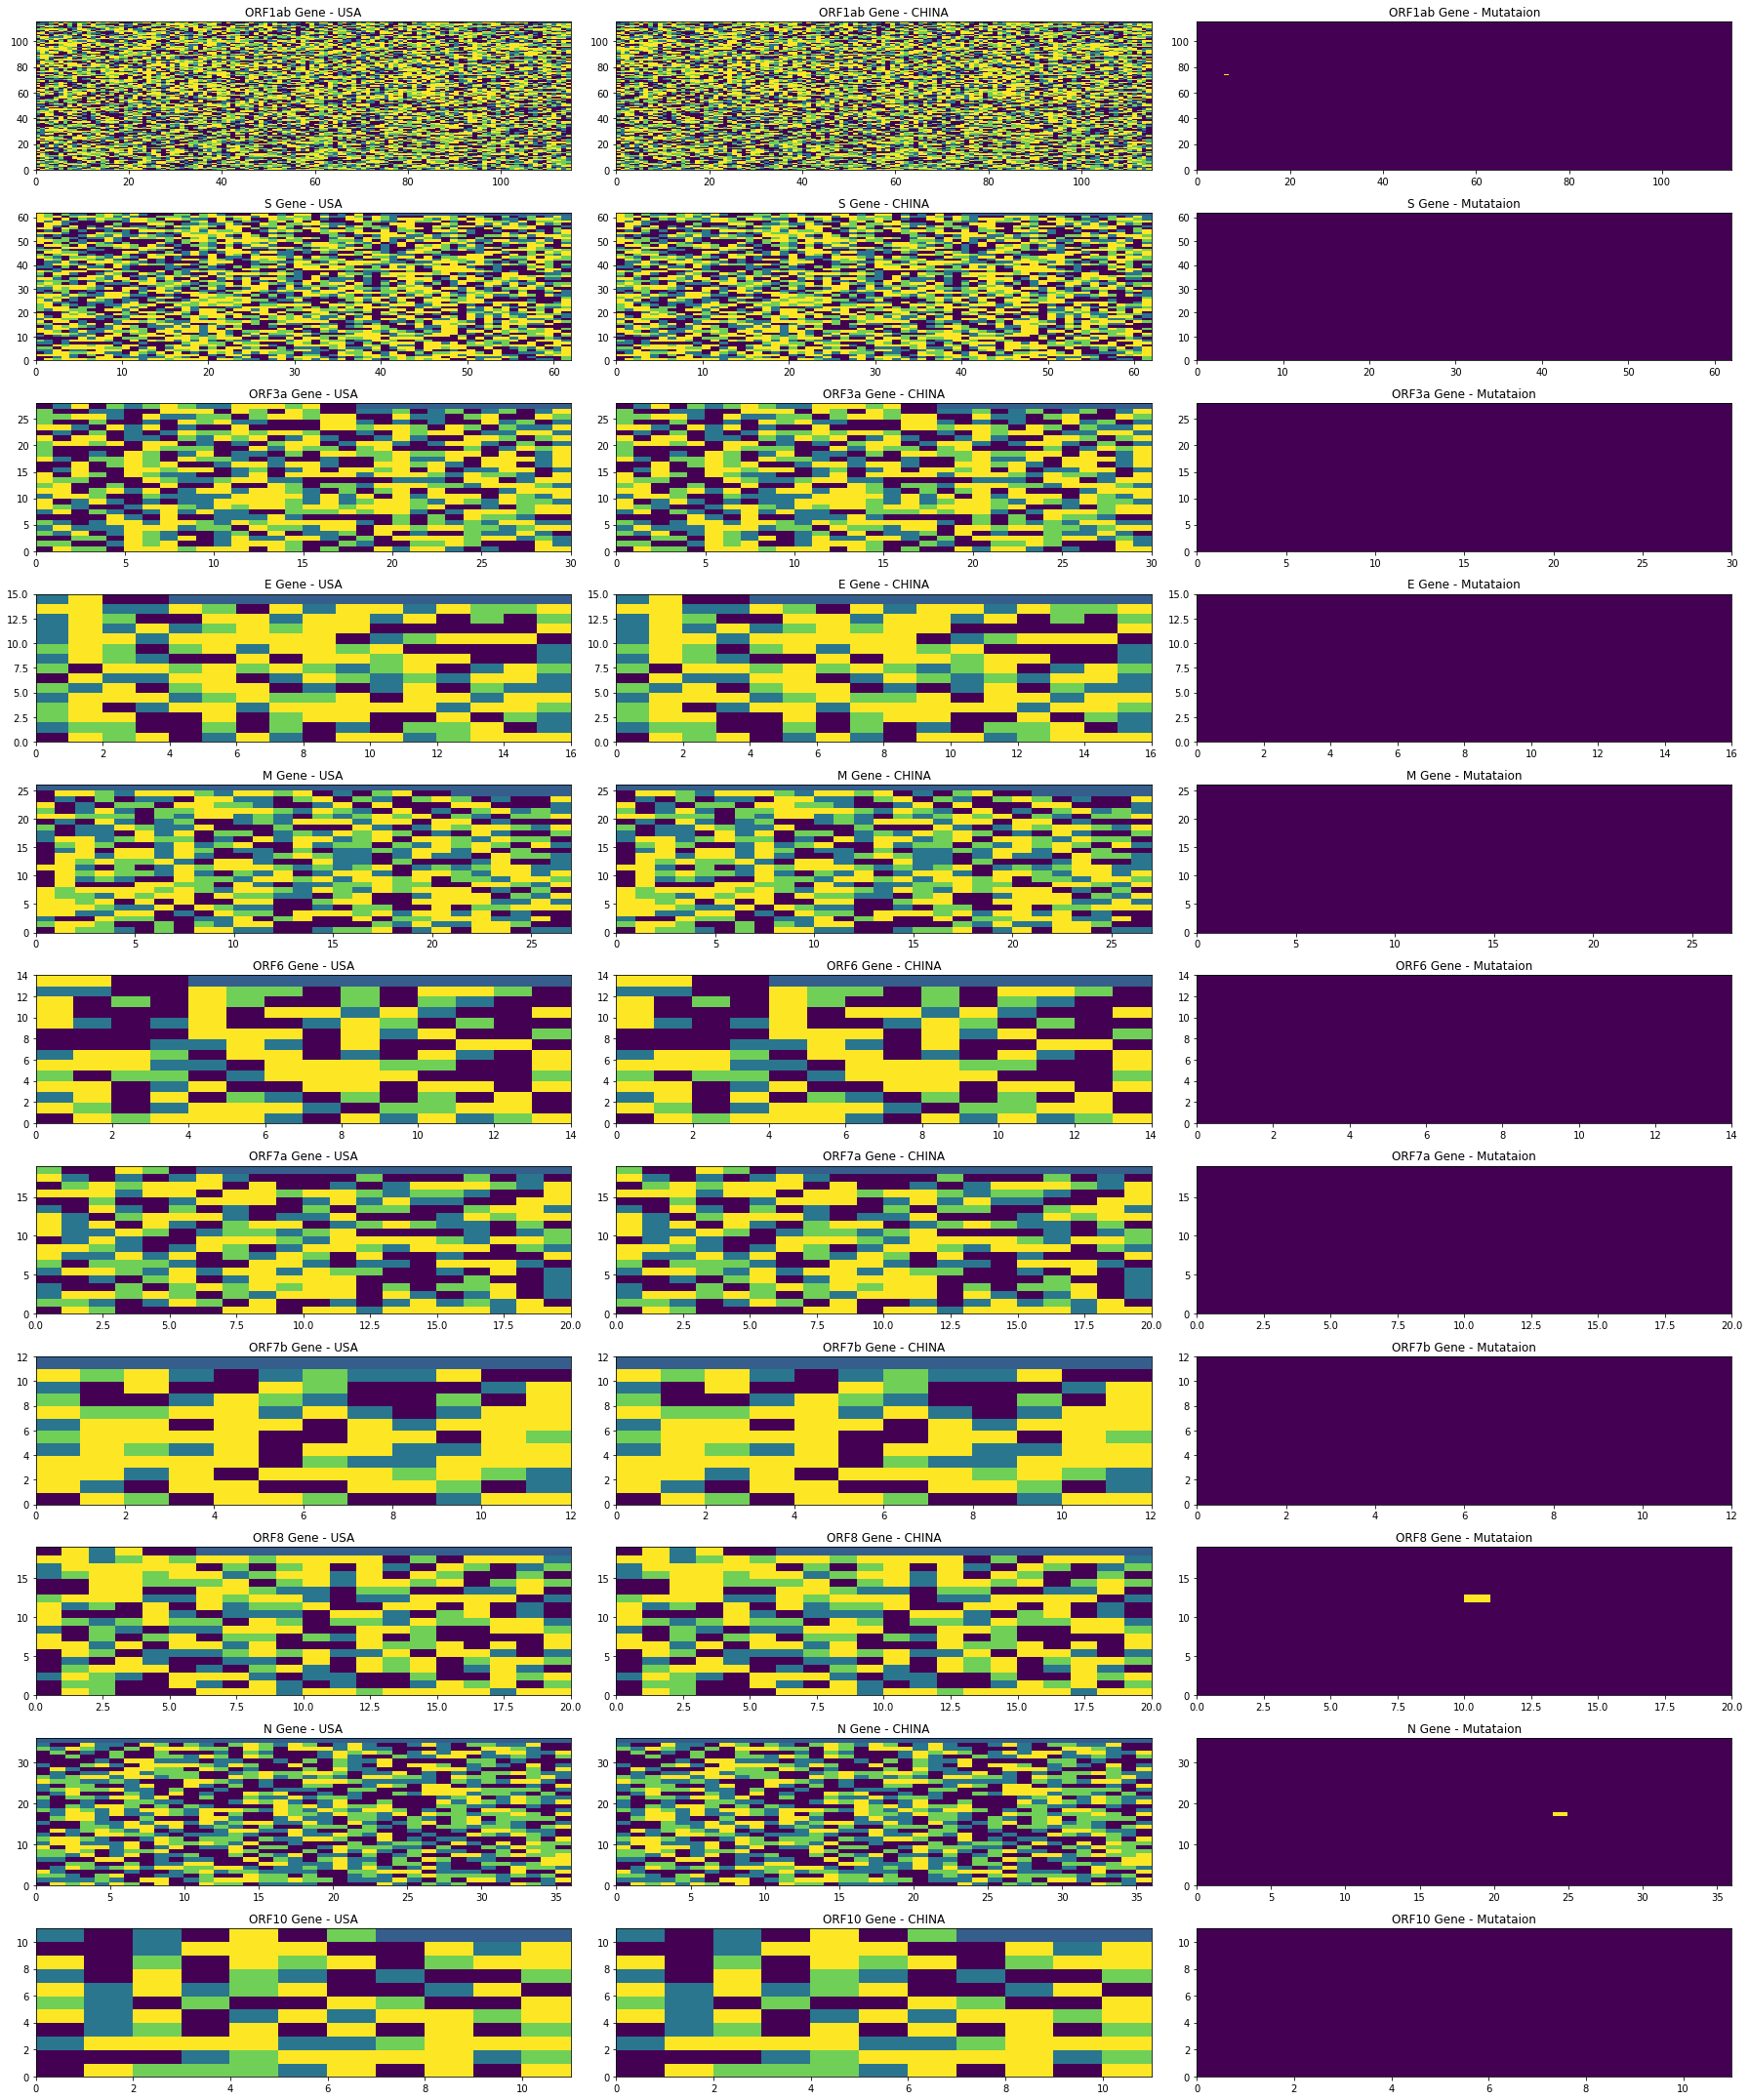

In [10]:
# Create matplotlib subplots for each gene. 
f,ax = plt.subplots(nrows=11,ncols=3,figsize=(25,30))
gene_name = list(numpy_image_dict.keys())
row = 0
col = 0
mut_dict={}
for i in gene_name:
    G = i[5:]
    # Loop thru each gene in the Cornona Virus nucleotide sequence.
    gene_us = dna(dict_seq_1['gene='+G][1])
    # Invoke the transcription method of the class dna 
    gene_us.transcription()
    # Invoke the mothod that converts the gene sequence into a numpy array.
    numpfy_usa = gene_us.numpfy()
    # Reshape the numpy array with a predeifned shape from the numpy_image_dict dictionary.
    numpfy_usa = numpfy_usa.reshape(numpy_image_dict['gene='+G][0])
    # sub-plot the numpy array with matplotlib pcolor method.
    ax[row][col].pcolor(numpfy_usa)
    ax[row][col].set_title(G+' Gene - USA')
    col+=1
    gene_china = dna(dict_seq_2['gene='+G][1])
    # Invoke the transcription method of the class dna 
    gene_china.transcription()
    # Invoke the mothod that converts the gene sequence into a numpy array.
    numpfy_china = gene_china.numpfy()
    # Reshape the numpy array with a predeifned shape from the numpy_image_dict dictionary.
    numpfy_china = numpfy_china.reshape(numpy_image_dict['gene='+G][0])
    # sub-plot the numpy array with matplotlib pcolor method.
    ax[row][col].pcolor(numpfy_china)
    ax[row][col].set_title(G+' Gene - CHINA')
    col+=1

    # To find the gene mutation subtract the numpy array from base sequence with the newer sequence. Here the 
    # the Chinese sequence is the base sequence and the USA sequence is a newer sequence.
    mut = numpfy_china - numpfy_usa
    if mut.any():
        # Here we are looking for a non zero value in the mutated numpy array (result of the subtracting the 2 numpy arrays).
        # Presence of non-zero value means that there is difference between the 2 numpy arrays and the gene has 
        # mutataions. If there are mutations in the gene create a python dictionary "mut_dict" with details as below.
        # {'<Gene_Name-1>': [[<value_of_base_seq>, <value_of_newer_seq>, <value_in_mutated_numpy>, (x_value,y_value)]], '<Gene_Name-2>': [[<value_of_base_seq>, <value_of_newer_seq>, <value_in_mutated_numpy>, (x_value,y_value)]]}
        mut_nec = np.nonzero(mut)
        x=mut_nec[0]
        y=mut_nec[1]
        l=0
        mut_dict[G]=[]
        for i in x:
            us_base = numpfy_usa[i][y[l]]
            ch_base = numpfy_china[i][y[l]]
            mut_base = mut[i][y[l]]
            info_list = [ch_base,us_base,mut_base,(i,y[l])]
            mut_dict[G].append(info_list)
            print("Mutated DNA Base {} in China and Base {} in USA at position {} For the Gene {}".format(ch_base,us_base,(i,y[l]),G))
            l+= 1
    # Giving a title to the matplotlib subplot
    ax[row][col].pcolor(mut)
    ax[row][col].set_title(G+' Gene - Mutataion')
    row+= 1
    col=0

f.tight_layout()